# Vyhodnotenie

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import openpyxl
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve

In [2]:
def predict(X, treshold):
    y_pred = []
    for record in X:
        if record > treshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return y_pred

In [3]:
def find_best_treshold(X, y_true, tresholds):
    best_treshold = -1
    best_score = 0
    
    for treshold in tresholds:
        y_pred = predict(X, treshold)
        
        score = f1_score(y_true, y_pred)
        if(score > best_score):
            best_treshold = treshold
            best_score = score
            
    return best_treshold, best_score

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000000)

In [5]:
results_inform = pd.read_excel("../datasets/results/hrd_results_inform.xlsx", index_col=0) 

results_inform

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.006962,0,0,31,25,21,18,16,14,12,9,4,4,9,12,14,16,18,21,25,31,NaN,unknown,negative
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.030277,0,0,36,26,24,22,21,13,10,7,6,6,7,10,13,21,22,24,26,36,NaN,unknown,negative
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.051299,0,0,128,102,77,59,44,35,29,23,17,17,23,29,35,44,59,77,102,128,17.0,unknown,negative
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,40,45,59,70,91,19.0,deceased,negative
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060479,0,0,23,14,13,11,11,8,7,7,7,7,7,7,8,11,11,13,14,23,2.0,unknown,negative
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,30,39,47,57,79,NaN,stable,negative


## Reálne výsledky

In [6]:
inform_known_response = results_inform.loc[results_inform['Response - real'] != 'unknown']

In [7]:
inform_stable = results_inform.loc[results_inform['Response - cell lines'] == 'stable']
inform_deceased = results_inform.loc[results_inform['Response - cell lines'] == 'deceased']

### Klasifikácia

In [8]:
inform_known_response.loc[inform_known_response['Response - real'] == 'deceased', 'Response - real numeric'] = 0
inform_known_response.loc[inform_known_response['Response - real'] == 'stable', 'Response - real numeric'] = 1

inform_known_response

/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - real numeric
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative,0.0
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,40,45,59,70,91,19.0,deceased,negative,0.0
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive,0.0
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,30,39,47,57,79,NaN,stable,negative,1.0
10,P07/P7.MS.00A.WGS_events.txt,P07/P07.MS_00A.WGS.Source.vcf.gz,MS_00A.T,0.967578,0,0,92,72,57,50,44,31,30,28,26,26,28,30,31,44,50,57,72,92,NaN,stable,negative,1.0
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive,1.0
27,P24/P24.I062.035.WGS_events.txt,P24/P24.I062.035.WGS.Source.vcf.gz,I062_035_2M1_D1,1.000028,6,6,2,1,1,1,1,1,1,1,0,12,13,13,13,13,13,13,13,14,NaN,deceased,negative,0.0
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive,1.0


In [9]:
y_true = inform_known_response['Response - real numeric'].tolist()

#### LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [10]:
LST_10_treshold = 11

In [11]:
data_LST_10 = inform_known_response['LST_10Mb'].tolist()

<AxesSubplot:>

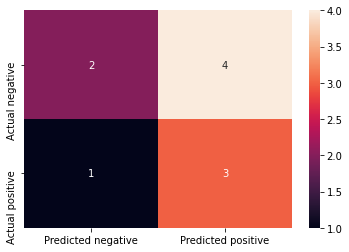

In [12]:
y_pred_LST_10 = predict(data_LST_10, LST_10_treshold)

cm = confusion_matrix(y_true, y_pred_LST_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [13]:
f1_score(y_true, y_pred_LST_10)

0.5454545454545454

##### Pokus o nájdenie najoptimálnejšieho LST_10Mb hraničného skóre

In [14]:
best_LST_10_treshold, best_LST_10_f1_score = find_best_treshold(data_LST_10, y_true, [x for x in range(7, 15)])

best_LST_10_treshold, best_LST_10_f1_score

(7, 0.6666666666666666)

Na našich dátach sa ukázalo ako optimálne hraničné skóre metriky LST 10Mb hodnota 7.

Skúsime si vizualizovať výsledky pri použití hraničného skóre 7.

<AxesSubplot:>

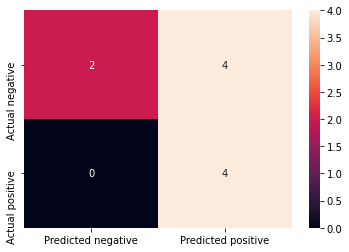

In [15]:
y_pred_LST_10_best = predict(data_LST_10, best_LST_10_treshold)

cm = confusion_matrix(y_true, y_pred_LST_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

##### HRD s LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [16]:
HRD_10_treshold = 42

In [17]:
data_HRD_10 = inform_known_response['HRD_10'].tolist()

<AxesSubplot:>

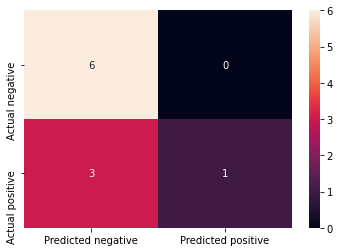

In [18]:
y_pred_HRD_10 = predict(data_HRD_10, HRD_10_treshold)

cm = confusion_matrix(y_true, y_pred_HRD_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [19]:
f1_score(y_true, y_pred_HRD_10)

0.4

Vzhľadom na to že hranica 42 je pri našich dátach pomerne vysoká, metóda pri tejto hranici nedokázala dobre zaklasifikovať tumory.

Vyskúšame klasifikáciu s nižšími hraničnými hodnotami.

##### 90 percentil ako HRD_10 hraničné skóre

In [20]:
HRD_10_treshold_2 = np.percentile(results_inform['HRD_10'], 90)

In [21]:
HRD_10_treshold_2 = 33

<AxesSubplot:>

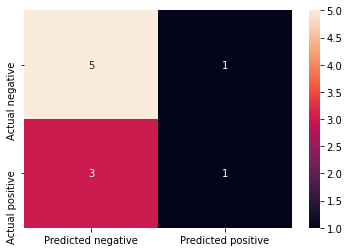

In [22]:
y_pred_HRD_10_2 = predict(data_HRD_10, HRD_10_treshold_2)

cm = confusion_matrix(y_true, y_pred_HRD_10_2)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [23]:
f1_score(y_true, y_pred_HRD_10_2)

0.3333333333333333

Pri použití 90 percentilu je F1 skóre ešte nižšie.

##### Pokus o nájdenie najoptimálnejšieho HRD_10 hraničného skóre

In [24]:
best_HRD_10_treshold, best_HRD_10_f1_score = find_best_treshold(data_HRD_10, y_true, [x for x in range(25, 42)])

best_HRD_10_treshold, best_HRD_10_f1_score

(25, 0.75)

<AxesSubplot:>

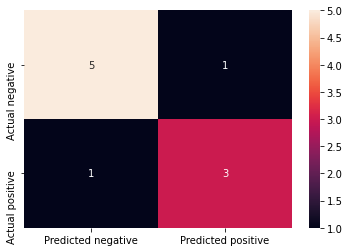

In [25]:
y_pred_HRD_10_best = predict(data_HRD_10, best_HRD_10_treshold)

cm = confusion_matrix(y_true, y_pred_HRD_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

Ako najlepšie klasifikujúce hraničné HRD skóre sa ukázala byť hodnota 25.

Vyzerá, že HRD klasifikuje lepšie ako LST 10Mb.

Vzhľadom na celkovú distribúciu hodnôt metrík TAI a LOH nevyzerá, že by mohli byť úspešné ako samostatné metódy. Napriek tomu podobne ako pri predošlých algoritmoch skúsime vyhodnotiť a optimalizovať klasifikáciu pomocou týchto metód. 

##### LOH

In [26]:
data_LOH = inform_known_response['LOH'].tolist()

In [27]:
best_LOH_treshold, best_LOH_f1_score = find_best_treshold(data_LOH, y_true, [x for x in range(0, 11)])

best_LOH_treshold, best_LOH_f1_score

(6, 0.6666666666666666)

<AxesSubplot:>

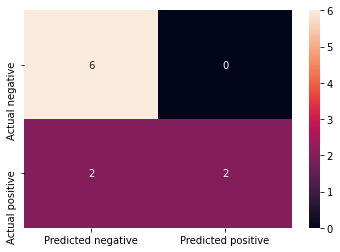

In [28]:
y_pred_LOH_best = predict(data_LOH, best_LOH_treshold)

cm = confusion_matrix(y_true, y_pred_LOH_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

##### TAI

In [29]:
data_TAI = inform_known_response['TAI'].tolist()

In [30]:
best_TAI_treshold, best_TAI_f1_score = find_best_treshold(data_TAI, y_true, [x for x in range(0, 11)])

best_TAI_treshold, best_TAI_f1_score

(6, 0.6666666666666666)

<AxesSubplot:>

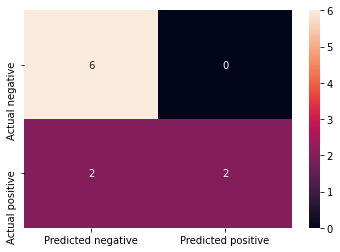

In [31]:
y_pred_TAI_best = predict(data_TAI, best_TAI_treshold)

cm = confusion_matrix(y_true, y_pred_TAI_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

Ako optimálne hraničné skóre sa ukázala byť hodnota 6 pri oboch metrikách. Avšak tieto hodnoty sú zrejme vzhľadom na veľmi malé množstvo dát skreslené.

#### Analýza pozitívnych pacientov

In [32]:
inform_stable

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines


Pozrieme sa na pacientov, ktorých HRD_10 zaklasifikovalo ako pozitívnych a LST 10Mb ako negatívnych.

In [33]:
inform_stable.loc[(inform_stable['HRD_10'] > best_HRD_10_treshold) & (inform_stable['LST_10Mb'] <= best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines


Vidíme, že takýto pacienti neexistujú.

Teraz sa naopak pozrieme na pacientov, ktorých LST 10Mb zaklasifikovalo ako pozitívnych a HRD 10 ako negatívnych

In [34]:
inform_stable.loc[(inform_stable['HRD_10'] <= best_HRD_10_treshold) & (inform_stable['LST_10Mb'] > best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines


In [35]:
inform_stable.loc[(inform_stable['HRD_10'] > best_HRD_10_treshold) & (inform_stable['LST_10Mb'] > best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines


Už iba samotné LST 10Mb dokázalo správne zaklasifikovať všetkých pozitívnych pacientov, pričom HRD 10 v jednom prípade dokonca nesprávne zaklasifikovalo pozitívneho pacienta.

## Výsledky z bunkových línií

In [36]:
inform_known_cl_response = results_inform.loc[results_inform['Response - cell lines'] != 'unknown']

In [37]:
inform_positive = results_inform.loc[results_inform['Response - cell lines'] == 'positive']
inform_negative = results_inform.loc[results_inform['Response - cell lines'] == 'negative']

### Klasifikácia

In [38]:
inform_known_cl_response.loc[inform_known_cl_response['Response - cell lines'] == 'negative', 'Response - cell lines numeric'] = 0
inform_known_cl_response.loc[inform_known_cl_response['Response - cell lines'] == 'positive', 'Response - cell lines numeric'] = 1

inform_known_cl_response

/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/mnt/d/skola/Bakalarka/bp-env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines,Response - cell lines numeric
0,P01/P1.I042.001.WGS_events.txt,NaN,NaN,1.006962,0,0,31,25,21,18,16,14,12,9,4,4,9,12,14,16,18,21,25,31,NaN,unknown,negative,0.0
1,P01/P1.I062.003.WGS_events.txt,NaN,NaN,1.030277,0,0,36,26,24,22,21,13,10,7,6,6,7,10,13,21,22,24,26,36,NaN,unknown,negative,0.0
2,P02/P2.MS.00F.WGS_events.txt,P02/P02.MS_00F.WGS.Source.vcf.gz,MS_00F.T,1.051299,0,0,128,102,77,59,44,35,29,23,17,17,23,29,35,44,59,77,102,128,17.0,unknown,negative,0.0
3,P03/P3.I062.007.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met4,1.023299,0,0,33,20,14,13,12,9,7,7,4,4,7,7,9,12,13,14,20,33,18.0,deceased,negative,0.0
4,P03/P3.I062.015.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met5,1.045612,0,0,91,70,59,45,40,31,29,24,20,20,24,29,31,40,45,59,70,91,19.0,deceased,negative,0.0
5,P03/P3.I062.022.WGS_events.txt,NaN,NaN,1.013319,0,0,180,138,106,91,76,63,46,38,31,31,38,46,63,76,91,106,138,180,19.0,deceased,negative,0.0
6,P03/P3.I062.033.WGS_events.txt,P03/P06.WGS.raw.vcf.gz,P6.Met7,1.048072,1,1,96,69,52,46,31,26,22,22,20,22,24,24,28,33,48,54,71,98,20.0,deceased,negative,0.0
7,P04/P4.I042.002.WGS_events.txt,P04/P04.I042_002.WGS.Source.vcf.gz,I042_002.T,1.060479,0,0,23,14,13,11,11,8,7,7,7,7,7,7,8,11,11,13,14,23,2.0,unknown,negative,0.0
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive,1.0
9,P06/P6.HD.00J.WGS_events.txt,P06/P06.HD_00J.WGS.HF.Source.vcf.gz,HD_00J.T,1.124490,0,0,79,57,47,39,30,25,23,18,17,17,18,23,25,30,39,47,57,79,NaN,stable,negative,0.0


In [39]:
y_true_cl = inform_known_cl_response['Response - cell lines numeric'].tolist()

#### LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [40]:
LST_10_treshold = 11

In [41]:
data_LST_10 = inform_known_cl_response['LST_10Mb'].tolist()

<AxesSubplot:>

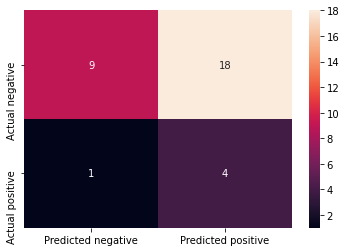

In [42]:
y_pred_LST_10 = predict(data_LST_10, LST_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [43]:
f1_score(y_true_cl, y_pred_LST_10)

0.2962962962962963

##### Pokus o nájdenie najoptimálnejšieho LST_10Mb hraničného skóre

In [44]:
best_LST_10_treshold, best_LST_10_f1_score = find_best_treshold(data_LST_10, y_true_cl, [x for x in range(7, 15)])

best_LST_10_treshold, best_LST_10_f1_score

(9, 0.3571428571428571)

Na našich dátach sa ukázalo ako optimálne hraničné skóre metriky LST 10Mb hodnota 9 avšak aj toto skóre dáva veľmi nízku hodnotu F1 skóre.

Skúsime si vizualizovať výsledky pri použití hraničného skóre 9.

<AxesSubplot:>

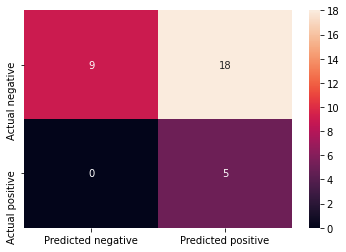

In [45]:
y_pred_LST_10_best = predict(data_LST_10, best_LST_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LST_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

##### HRD s LST 10 Mb

##### Vyhodnotenie pre hraničné skóre podľa článku

In [46]:
HRD_10_treshold = 42

In [47]:
data_HRD_10 = inform_known_cl_response['HRD_10'].tolist()

<AxesSubplot:>

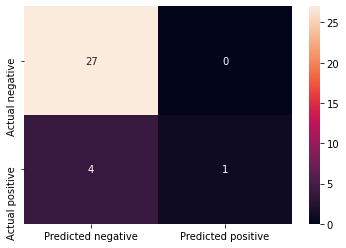

In [48]:
y_pred_HRD_10 = predict(data_HRD_10, HRD_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_10)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [49]:
f1_score(y_true_cl, y_pred_HRD_10)

0.33333333333333337

Vzhľadom na to že hranica 42 je pri našich dátach pomerne vysoká, metóda pri tejto hranici nedokázala dobre zaklasifikovať tumory.

Vyskúšame klasifikáciu s nižšími hraničnými hodnotami.

##### 90 percentil ako HRD_10 hraničné skóre

In [50]:
np.percentile(results_inform['HRD_10'], 90)

33.400000000000006

In [51]:
HRD_10_treshold_2 = 33

<AxesSubplot:>

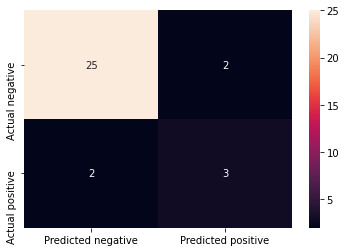

In [52]:
y_pred_HRD_10_2 = predict(data_HRD_10, HRD_10_treshold_2)

cm = confusion_matrix(y_true_cl, y_pred_HRD_10_2)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

In [53]:
f1_score(y_true_cl, y_pred_HRD_10_2)

0.6

Pri použití 90 percentilu je F1 skóre o niečo lepšie kedže sme dokázali zachytiť viac pozitívnych pacientov.

##### Pokus o nájdenie najoptimálnejšieho HRD_10 hraničného skóre

In [54]:
best_HRD_10_treshold, best_HRD_10_f1_score = find_best_treshold(data_HRD_10, y_true_cl, [x for x in range(25, 42)])

best_HRD_10_treshold, best_HRD_10_f1_score

(29, 0.7272727272727272)

<AxesSubplot:>

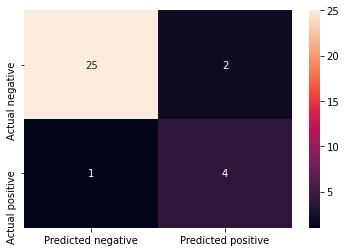

In [55]:
y_pred_HRD_10_best = predict(data_HRD_10, best_HRD_10_treshold)

cm = confusion_matrix(y_true_cl, y_pred_HRD_10_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

Ako najlepšie klasifikujúce hraničné HRD skóre sa ukázala byť hodnota 29.

Opäť vyzerá, že HRD klasifikuje lepšie ako LST 10Mb.

Pozrime sa ešte na LOH a TAI.

##### LOH

In [56]:
data_LOH = inform_known_cl_response['LOH'].tolist()

In [57]:
best_LOH_treshold, best_LOH_f1_score = find_best_treshold(data_LOH, y_true_cl, [x for x in range(0, 11)])

best_LOH_treshold, best_LOH_f1_score

(8, 0.5714285714285715)

<AxesSubplot:>

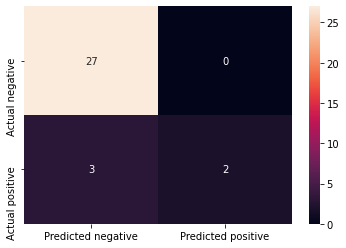

In [58]:
y_pred_LOH_best = predict(data_LOH, best_LOH_treshold)

cm = confusion_matrix(y_true_cl, y_pred_LOH_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

##### TAI

In [59]:
data_TAI = inform_known_cl_response['TAI'].tolist()

In [60]:
best_TAI_treshold, best_TAI_f1_score = find_best_treshold(data_TAI, y_true_cl, [x for x in range(0, 11)])

best_TAI_treshold, best_TAI_f1_score

(8, 0.5714285714285715)

<AxesSubplot:>

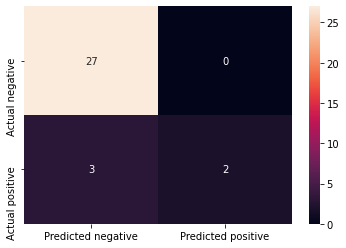

In [61]:
y_pred_TAI_best = predict(data_TAI, best_TAI_treshold)

cm = confusion_matrix(y_true_cl, y_pred_TAI_best)
df_cm = pd.DataFrame(cm, index=['Actual negative', 'Actual positive'], columns=['Predicted negative', 'Predicted positive'])

sns.heatmap(df_cm, annot=True)

Ako optimálne hraničné skóre sa ukázala byť hodnota 8 pri oboch metrikách. Avšak tieto hodnoty sú zrejme vzhľadom na veľmi malé množstvo dát skreslené.

#### Analýza pozitívnych pacientov

In [62]:
inform_positive

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive
21,P18/P18.I062_021.WGS_events.txt,P18/P18.I062.021.WGS.Source.vcf.gz,I0622_021.T,1.075633,0,0,150,113,87,61,51,48,41,36,27,27,36,41,48,51,61,87,113,150,16.0,unknown,positive
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive


Pozrieme sa na pacientov, ktorých HRD_10 zaklasifikovalo ako pozitívnych a LST 10Mb ako negatívnych.

In [63]:
inform_positive.loc[(inform_positive['HRD_10'] > best_HRD_10_treshold) & (inform_positive['LST_10Mb'] <= best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines


Vidíme, že takýto pacienti neexistujú.

Teraz sa naopak pozrieme na pacientov, ktorých LST 10Mb zaklasifikovalo ako pozitívnych a HRD 10 ako negatívnych

In [64]:
inform_positive.loc[(inform_positive['HRD_10'] <= best_HRD_10_treshold) & (inform_positive['LST_10Mb'] > best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines
8,P05/P5.HA.00B.WGS_events.txt,P05/P05.HA_00B.WGS.Source.vcf.gz,HA_00B.T,1.061233,0,0,178,114,78,63,51,43,31,22,22,22,22,31,43,51,63,78,114,178,NaN,deceased,positive


In [65]:
inform_positive.loc[(inform_positive['HRD_10'] > best_HRD_10_treshold) & (inform_positive['LST_10Mb'] > best_LST_10_treshold)]

,Segmental report,VCF,Sample name,DNA index,TAI,LOH,LST_3Mb,LST_4Mb,LST_5Mb,LST_6Mb,LST_7Mb,LST_8Mb,LST_9Mb,LST_10Mb,LST_11Mb,HRD_11,HRD_10,HRD_9,HRD_8,HRD_7,HRD_6,HRD_5,HRD_4,HRD_3,Age,Response - real,Response - cell lines
17,P14/P14.I062.006.WES_events.txt,P14/P14.I062.006.WGS.HF.Source.vcf.gz,I062.006.T,1.134657,48,23,155,116,78,60,50,47,38,29,24,95,100,109,118,121,131,149,187,226,16.0,stable,positive
21,P18/P18.I062_021.WGS_events.txt,P18/P18.I062.021.WGS.Source.vcf.gz,I0622_021.T,1.075633,0,0,150,113,87,61,51,48,41,36,27,27,36,41,48,51,61,87,113,150,16.0,unknown,positive
24,P21/P21.I037.002.WGS_events.txt,P21/P21.I037.002.WGS.Source.vcf.gz,I037_002_3M1_D1,1.058271,5,4,89,72,60,51,43,40,36,33,29,38,42,45,49,52,60,69,81,98,14.0,unknown,positive
30,P27/P27.I047.007.WGS_events.txt,P27/P27.I047.007.WGS.Source.vcf.gz,I047_007_2M1_D1,1.041465,11,10,146,93,54,38,26,23,15,10,8,29,31,36,44,47,59,75,114,167,14.0,stable,positive


Už iba samotné LST 10Mb dokázalo správne zaklasifikovať všetkých pozitívnych pacientov, pričom HRD 10 v jednom prípade dokonca nesprávne zaklasifikovalo pozitívneho pacienta.